In [2]:
pip install sentence_transformers


  Obtaining dependency information for sentence_transformers from https://files.pythonhosted.org/packages/76/2c/bd95032aeb087b0706596af0a4518c4bfe0439a1bb149048ece18b617766/sentence_transformers-2.7.0-py3-none-any.whl.metadata
  Obtaining dependency information for transformers<5.0.0,>=4.34.0 from https://files.pythonhosted.org/packages/cf/90/2596ac2ab49c4df6ff1fceaf7f5afb18401ba2f326348ce1a6261a65e7ed/transformers-4.40.1-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/138.0 kB ? eta -:--:--
     -- ------------------------------------- 10.2/138.0 kB ? eta -:--:--
     -------- ---------------------------- 30.7/138.0 kB 325.1 kB/s eta 0:00:01
     ---------- -------------------------- 41.0/138.0 kB 326.8 kB/s eta 0:00:01
     ----------------------------- ------ 112.6/138.0 kB 595.3 kB/s eta 0:00:01
     ------------------------------------ 138.0/138.0 kB 679.5 kB/s eta 0:00:00
  Obtaining dependency information for torch>=1.11.0 from https://files.pythonho

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.10.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.25.3 which is incompatible.
skimpy 0.0.9 requires pandas<3.0.0,>=2.0.3, but you have pandas 1.5.3 which is incompatible.



   -------------------- ----------------- 122.3/228.5 MB 568.8 kB/s eta 0:03:07
   -------------------- ----------------- 122.3/228.5 MB 566.8 kB/s eta 0:03:08
   -------------------- ----------------- 122.3/228.5 MB 565.9 kB/s eta 0:03:08
   -------------------- ----------------- 122.3/228.5 MB 564.9 kB/s eta 0:03:08
   -------------------- ----------------- 122.4/228.5 MB 563.9 kB/s eta 0:03:09
   -------------------- ----------------- 122.4/228.5 MB 562.4 kB/s eta 0:03:09
   -------------------- ----------------- 122.4/228.5 MB 562.5 kB/s eta 0:03:09
   -------------------- ----------------- 122.4/228.5 MB 560.5 kB/s eta 0:03:10
   -------------------- ----------------- 122.4/228.5 MB 560.5 kB/s eta 0:03:10
   -------------------- ----------------- 122.5/228.5 MB 559.1 kB/s eta 0:03:10
   -------------------- ----------------- 122.5/228.5 MB 558.6 kB/s eta 0:03:10
   -------------------- ----------------- 122.5/228.5 MB 556.7 kB/s eta 0:03:11
   -------------------- ---------------

In [4]:
import chime
%load_ext chime
chime.theme('mario')

In [5]:
chime.success()

In [6]:
import pandas as pd
import seaborn as sns
from sentence_transformers import SentenceTransformer, util
from collections import defaultdict

In [87]:
import numpy as np

# Load data

- https://huggingface.co/datasets/medical_questions_pairs/viewer

- https://huggingface.co/sentence-transformers

- https://www.sbert.net/docs/quickstart.html

In [4]:
df = pd.read_parquet("./data/train-00000-of-00001.parquet")

In [9]:
from datasets import load_dataset

df = load_dataset("medical_questions_pairs")

Generating train split:   0%|          | 0/3048 [00:00<?, ? examples/s]

In [24]:
df = pd.DataFrame(df['train'])

In [25]:
df.head()

,dr_id,question_1,question_2,label
0,1,After how many hour from drinking an antibioti...,I have a party tonight and I took my last dose...,1
1,1,After how many hour from drinking an antibioti...,I vomited this morning and I am not sure if it...,0
2,1,Am I over weight (192.9) for my age (39)?,I am a 39 y/o male currently weighing about 19...,1
3,1,Am I over weight (192.9) for my age (39)?,What diet is good for losing weight? Keto or v...,0
4,1,Aspirin allergy - is it worth getting a bracelet?,How much Aspirin can I take for my headache wi...,0


In [26]:
df.iloc[0].question_1

'After how many hour from drinking an antibiotic can I drink alcohol?'

# Quick and durty

In [27]:
model = SentenceTransformer("all-MiniLM-L6-v2")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

c:\Users\elpiz\anaconda3\envs\ds_practicum_env\lib\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\elpiz\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [28]:
res = list()
for _, rec in df.iterrows():
    # Sentences are encoded by calling model.encode()
    emb1 = model.encode(rec.question_1)
    emb2 = model.encode(rec.question_2)
    cos_sim = util.cos_sim(emb1, emb2)
    res.append({"id": rec.dr_id, "label": rec.label, "dist": cos_sim.detach().numpy()[0][0]})

In [35]:
# sentence_embeddings = model.encode(sentences)

In [31]:
df_res = pd.DataFrame(res)

In [32]:
df_res

,id,label,dist
0,1,1,0.572843
1,1,0,0.574871
2,1,1,0.845366
3,1,0,0.162505
4,1,0,0.437332
...,...,...,...
3043,11,1,0.719861
3044,11,0,0.490555
3045,11,1,0.886744
3046,11,0,0.549664


<Axes: xlabel='dist', ylabel='Count'>

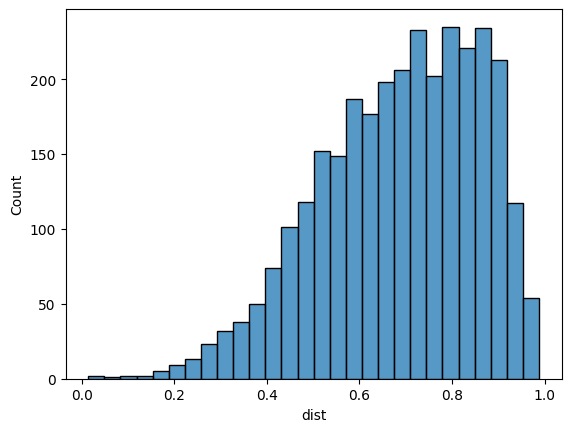

In [33]:
sns.histplot(data=df_res, x="dist")

<Axes: xlabel='dist', ylabel='Count'>

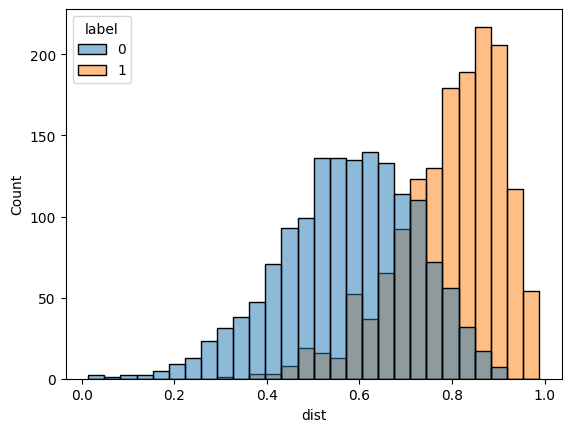

In [34]:
sns.histplot(data=df_res, x="dist", hue="label")

# Baseline

## Combine all texts in one corpus

In [37]:
corpus = list(set(df.question_1.tolist() + df.question_2.tolist()))

In [38]:
len(corpus)

4567

Уникальных текстов 4567

In [39]:
corpus[:10]

['What is the role of a medical physicist in the treatment of cancer?',
 'There is no pain on the area except the pinkish color, but it causes me to worry. Is this something major?',
 'Why do I get this feeling that there is something crawling on my legs?',
 'How can a DHT blocker affect a female user on birthcontrol?',
 "I'm in high school.I need to get to bet by 8:00 pm to get 9hours of sleep.I find myself stating up until 11 pm. What can I do to get to bed on time ?",
 'Can doxycycline treat an ear infection?',
 'Can you suggest some exercises for my lower back? I had a lot of back ache and my doctor diagnose me with a lumbar strain. ',
 'My doctor asked me if I have burning micturition. I did not understand what exactly he meant, can you help me with that?',
 'How to tell if one has a "turtle neck?',
 "When is Lyme's test advised? Do I need it if I have fever and cough?"]

Нумеруем предложения и складываем в словарь

In [40]:
sen2idx = {text: i for i, text in enumerate(corpus)}

Обратный маппинг - из индексов в тексты.

In [41]:
idx2sen = {v: k for k, v in sen2idx.items()}

Для каждого предложения получаем эмбеддинг и складываем в словарь

In [42]:
idx2emd = {i: model.encode(text) for i, text in idx2sen.items()}

In [43]:
from pickle import dump

In [44]:
with open("idx2emb.pcl", "wb") as fid:
    dump(idx2emd, fid)

In [45]:
with open("idx2sen.pcl", "wb") as fid:
    dump(idx2sen, fid)

In [46]:
with open("sen2idx.pcl", "wb") as fid:
    dump(sen2idx, fid)

Перегоняем датафрейм в индексы предложений

In [47]:
gt = defaultdict(list)
for _, row in df.iterrows():
    idx1 = sen2idx[row.question_1]
    idx2 = sen2idx[row.question_2]

    if row.label:
        gt[idx1].append(idx2)
        gt[idx2].append(idx1)

In [65]:
row.question_1

'32 weeks pregnant. Headache strange leg weakness. Should I call doctor?'

In [49]:
gt['32 weeks pregnant. Headache strange leg weakness. Should I call doctor?']

[]

Создаём массив из эмбеддингов, чтобы на нём считать расстояния

## Считаем расстояния

In [51]:
from scipy.spatial.distance import pdist, squareform

In [52]:
emb_list = []
for i in range(len(idx2emd)):
    emb_list.append(idx2emd[i])

In [53]:
arr = np.array(emb_list)

In [54]:
dist = pdist(arr, metric="cosine")

In [55]:
dist_matrix = squareform(dist)

In [56]:
np.argsort(dist_matrix)

array([[   0, 3268, 4206, ..., 1245,  937, 4007],
       [   1, 1896,  388, ..., 4233, 1661,  617],
       [   2, 2565,  638, ..., 2163, 4441, 3424],
       ...,
       [4564, 2176,  717, ..., 1494,   16,  308],
       [4565,  131, 2155, ..., 2039,  251, 3245],
       [4566,  480, 1489, ..., 1783, 3176, 4547]], dtype=int64)

In [57]:
top5_indx = np.argsort(dist_matrix)[:, :6]

In [58]:
top5_indx

array([[   0, 3268, 4206,  151, 1249, 2162],
       [   1, 1896,  388, 2149, 2416, 3597],
       [   2, 2565,  638, 2315, 2639, 1515],
       ...,
       [4564, 2176,  717,  149,  854, 2701],
       [4565,  131, 2155,  547, 2564, 2292],
       [4566,  480, 1489, 1072, 3935,    4]], dtype=int64)

Для первого предложения получили рекомендации 757,  696, 4348, 4501, 2728. Смотрим глазами

In [59]:
idx2sen[0]

'What is the role of a medical physicist in the treatment of cancer?'

In [60]:
idx2sen[757]

'Are monochorionic-diamniotic twins usually healthy at birth?'

In [61]:
idx2sen[696]

"I'm having genital herpes outbreak, usuallly I take acyclovior. But pharm told me it might affect my ulcer. Any home remedies I can do to dry this up?!"

Выглядит хорошо

In [62]:
acc = []
for j in range(top5_indx.shape[0]):
    rec_idx = top5_indx[j, :]
    gt_idx = gt.get(j, [])
    if len(gt_idx) > 0:
        intersection = set(rec_idx).intersection(set(gt_idx))
        acc.append(len(intersection) > 0)

In [63]:
np.mean(acc)

0.9635826771653543

Точность решения по accuracy@5 = 96.3 %